In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [4]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

İlk eğitim datasetimizi inceleyelim.

In [5]:
df1 = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df2 = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Dosyaları birleştirme işlemi

In [7]:
data = pd.concat([df1,df2],ignore_index=True)
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Veriyi train ve test olarak ayıracağız.
* Train modelin öğrendiği veri
* Test modelin hiç görmediği doğruluk ölçtüğü veri olacak.

Train ve test dosyalarını ayırımı

In [8]:
train,test = train_test_split(
    data,
    test_size = 0.2,
    stratify = data['Personality'],
    random_state = 42
)

In [9]:
train.head(20)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2563,2.0,No,9.0,5.0,No,14.0,6.0,Extrovert
1039,7.0,Yes,0.0,1.0,Yes,1.0,2.0,Introvert
1544,10.0,Yes,3.0,2.0,Yes,1.0,2.0,Introvert
1741,1.0,No,5.0,3.0,No,12.0,9.0,Extrovert
2702,5.0,Yes,2.0,2.0,Yes,5.0,0.0,Introvert
2189,0.0,No,6.0,4.0,No,14.0,8.0,Extrovert
977,11.0,Yes,0.0,0.0,Yes,0.0,0.0,Extrovert
5210,2.0,No,9.0,4.0,No,8.0,7.0,Extrovert
4297,6.0,Yes,1.0,0.0,Yes,1.0,0.0,Introvert
3717,4.0,Yes,0.0,1.0,Yes,0.0,0.0,Introvert


In [10]:
train.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,4589.000000,4589.000000,4593.000000,4582.000000,4587.000000
mean,4.514231,3.973233,3.003701,6.301383,3.560074
std,3.473435,2.887599,2.247576,4.288300,2.919873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [11]:
train.isnull().sum()

Time_spent_Alone             51
Stage_fear                   59
Social_event_attendance      51
Going_outside                47
Drained_after_socializing    41
Friends_circle_size          58
Post_frequency               53
Personality                   0
dtype: int64

Sayısal sütunları ortalama ile doldurmak

In [12]:
num_cols = train.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    train[col] = train[col].fillna(data[col].mean())

In [13]:
train.isnull().sum()

Time_spent_Alone              0
Stage_fear                   59
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    41
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

Kategorik değişkenleri Mod(En çok görülen değer) ile doldurmak

In [14]:
train['Stage_fear'] = train['Stage_fear'].fillna(train['Stage_fear'].mode()[0])
train['Drained_after_socializing'] = train['Drained_after_socializing'].fillna(train['Drained_after_socializing'].mode()[0])

In [15]:
train.isnull().sum()
#Eksik değerlerden kurtulundu

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Hedef değişken (personality'nin incelenmesi)

<Axes: xlabel='Personality', ylabel='count'>

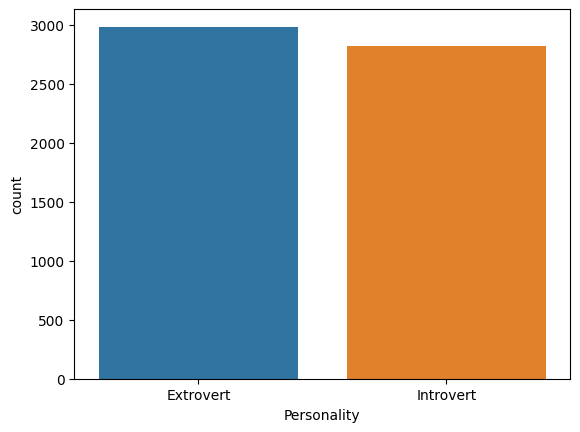

In [16]:
data["Personality"].value_counts(normalize=True)
sns.countplot(x="Personality", data=data)
#Sınıflar dengeli

Kategorik Sütunlar için Analiz

            Stage_fear      Ratio
Stage_fear                       
No                2393  51.573276
Yes               2247  48.426724
##########################################


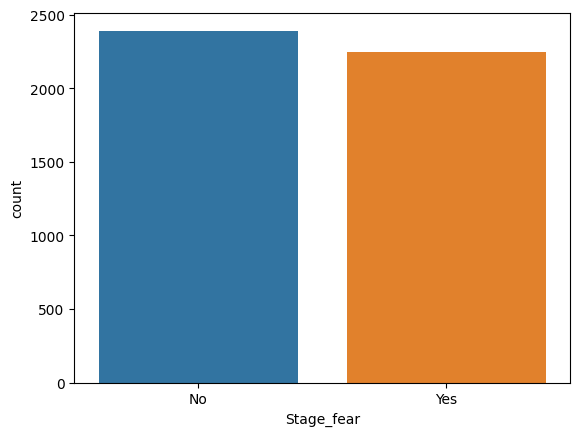

                           Drained_after_socializing      Ratio
Drained_after_socializing                                      
No                                              2394  51.594828
Yes                                             2246  48.405172
##########################################


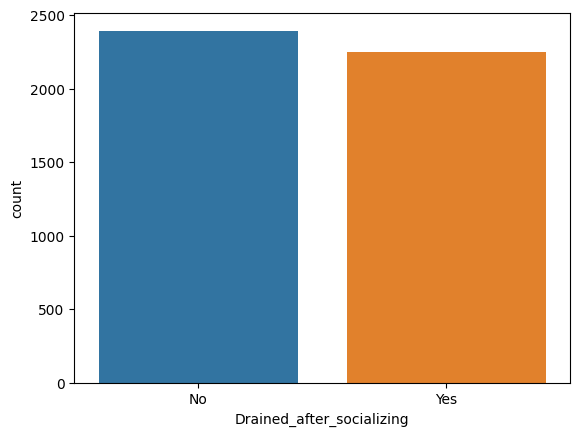

In [17]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

cat_summary(train,'Stage_fear',plot= True)
cat_summary(train,'Drained_after_socializing',plot= True)

# Genel olarak dengeli bir dağılım var

### Outlier (Aykırı Değer) Analizi

In [18]:
def outlier_threshold(dataframe,col_name,q1=0.25,q3=0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit,upper_limit

In [19]:
def check_outlier(dataframe,col_name):
    lower_limit,upper_limit =  outlier_threshold(dataframe,col_name)
    if dataframe[(dataframe[col_name] < lower_limit)| (dataframe[col_name] > upper_limit)].any(axis=None):
        return True
    else:
        return False

In [20]:
for col in num_cols:
    print(col,check_outlier(train,col))

# Aykırı değer yok

Time_spent_Alone False
Social_event_attendance False
Going_outside False
Friends_circle_size False
Post_frequency False


In [21]:
train['Stage_fear'] = train['Stage_fear'].map({"Yes":1,"No":0})
train['Drained_after_socializing'] = train['Drained_after_socializing'].map({"Yes":1,"No":0})

In [22]:
# Hedef değişkene de map uygulayalım
# Extrovert -> 1 Introvert -> 0 olacak şekilde
train["Personality"] = train['Personality'].map({'Extrovert':1,'Introvert':0})

In [23]:
# train datasetinde yapılan mapping işlemi test datasetine de uygulanır.
test['Stage_fear'] = test['Stage_fear'].map({"Yes":1,"No":0})
test['Drained_after_socializing'] = test['Drained_after_socializing'].map({"Yes":1,"No":0})

In [24]:
test["Personality"] = test['Personality'].map({'Extrovert':1,'Introvert':0})

In [25]:
train.head()
# bütün değerler sayısal gözüküyor
# Modelleme yapılabilir

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2563,2.0,0,9.0,5.0,0,14.0,6.0,1
1039,7.0,1,0.0,1.0,1,1.0,2.0,0
1544,10.0,1,3.0,2.0,1,1.0,2.0,0
1741,1.0,0,5.0,3.0,0,12.0,9.0,1
2702,5.0,1,2.0,2.0,1,5.0,0.0,0


In [26]:
test.isnull().sum()

Time_spent_Alone             12
Stage_fear                   14
Social_event_attendance      11
Going_outside                19
Drained_after_socializing    11
Friends_circle_size          19
Post_frequency               12
Personality                   0
dtype: int64

In [27]:
test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
3779,3.0,0.0,9.0,NaN,0.0,11.0,4.0,1
2135,2.0,0.0,7.0,6.0,0.0,12.0,4.0,1
5550,3.0,0.0,4.0,6.0,0.0,5.0,9.0,1
772,3.0,0.0,6.0,4.0,0.0,6.0,8.0,1
2992,9.0,1.0,1.0,1.0,1.0,1.0,3.0,0


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 3779 to 1081
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           1148 non-null   float64
 1   Stage_fear                 1146 non-null   float64
 2   Social_event_attendance    1149 non-null   float64
 3   Going_outside              1141 non-null   float64
 4   Drained_after_socializing  1149 non-null   float64
 5   Friends_circle_size        1141 non-null   float64
 6   Post_frequency             1148 non-null   float64
 7   Personality                1160 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 81.6 KB


In [29]:
test['Time_spent_Alone'] = test['Time_spent_Alone'].fillna(test['Time_spent_Alone'].mean())
test['Social_event_attendance'] = test['Social_event_attendance'].fillna(test['Social_event_attendance'].mean())
test['Going_outside'] = test['Going_outside'].fillna(test['Going_outside'].mean())
test['Friends_circle_size'] = test['Friends_circle_size'].fillna(test['Friends_circle_size'].mean())
test['Post_frequency'] = test['Post_frequency'].fillna(test['Post_frequency'].mean())

In [30]:
test['Stage_fear'] = test['Stage_fear'].fillna(test['Stage_fear'].mode()[0])
test['Drained_after_socializing'] = test['Drained_after_socializing'].fillna(test['Drained_after_socializing'].mode()[0])

In [31]:
test.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [32]:
test = test.astype(int)

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 3779 to 1081
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Time_spent_Alone           1160 non-null   int64
 1   Stage_fear                 1160 non-null   int64
 2   Social_event_attendance    1160 non-null   int64
 3   Going_outside              1160 non-null   int64
 4   Drained_after_socializing  1160 non-null   int64
 5   Friends_circle_size        1160 non-null   int64
 6   Post_frequency             1160 non-null   int64
 7   Personality                1160 non-null   int64
dtypes: int64(8)
memory usage: 81.6 KB


In [34]:
#model kurmak için train ve test'de bağımsız(X) ve bağımlı değişkenleri(Y) ayırmak
X_train = train.drop('Personality',axis=1)
y_train = train['Personality']

#Not: axis=1 sütun siler, axis=0 satır siler.

X_test = test.drop('Personality',axis=1)
y_test = test['Personality']

## LogisticRegression Modeli

Accuracy : 0.92

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

#modelin başarısı
print(f"Accuracy score: {accuracy_score(y_pred,y_test)}")
print(f"Classification report: \n {classification_report(y_pred,y_test)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_pred,y_test)}")

Accuracy score: 0.9206896551724137
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       566
           1       0.92      0.92      0.92       594

    accuracy                           0.92      1160
   macro avg       0.92      0.92      0.92      1160
weighted avg       0.92      0.92      0.92      1160

Confusion Matrix: 
 [[519  47]
 [ 45 549]]


## Diğer Modeller: Decision Tree, KNN , SVM, XGBOOST

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN" : KNeighborsClassifier(),
    "SVM": SVC(probability = True),
}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_pred,y_test)}")
    print(f"Classification report: \n {classification_report(y_pred,y_test)}")
    print(f"Confusion Matrix: \n {confusion_matrix(y_pred,y_test)}")
    print("####################################################################################################")

Random Forest:
Accuracy: 0.9586206896551724
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       572
           1       0.95      0.97      0.96       588

    accuracy                           0.96      1160
   macro avg       0.96      0.96      0.96      1160
weighted avg       0.96      0.96      0.96      1160

Confusion Matrix: 
 [[544  28]
 [ 20 568]]
####################################################################################################
Decision Tree:
Accuracy: 0.9568965517241379
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       578
           1       0.95      0.97      0.96       582

    accuracy                           0.96      1160
   macro avg       0.96      0.96      0.96      1160
weighted avg       0.96      0.96      0.96      1160

Confusion Matrix: 
 [[546  32]
 [ 18 564]]
#####################

### Personality Type Dataset ' i için en yüksek accuracy değeri **Random Forest**